In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

pyber_df = city_df.merge(ride_df)
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
city_type = pyber_df.groupby(["type"])
rural_df = pd.DataFrame(city_type.get_group("Rural"))
suburban_df = pd.DataFrame(city_type.get_group("Suburban"))
urban_df = pd.DataFrame(city_type.get_group("Urban"))
rural_df.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [3]:
rural_city = rural_df.groupby(["city"])
rural_avg = pd.DataFrame(round(rural_city["fare"].mean(),2))
rural_driver = pd.DataFrame(rural_city["driver_count"].mean())
rural_ride_ct = pd.DataFrame(rural_city["ride_id"].count())

suburban_city = suburban_df.groupby(["city"])
suburban_avg = pd.DataFrame(round(suburban_city["fare"].mean(),2))
suburban_driver = pd.DataFrame(suburban_city["driver_count"].mean())
suburban_ride_ct = pd.DataFrame(suburban_city["ride_id"].count())

urban_city = urban_df.groupby(["city"])
urban_avg = pd.DataFrame(round(urban_city["fare"].mean(),2))
urban_driver = pd.DataFrame(urban_city["driver_count"].mean())
urban_ride_ct = pd.DataFrame(urban_city["ride_id"].count())
(urban_df["fare"].sum(), suburban_df["fare"].sum(), rural_df["fare"].sum())

(39854.380000000005, 19356.33, 4327.929999999999)

Text(1, 0.5, 'Note:\nCircle size correlates with driver count per city.')

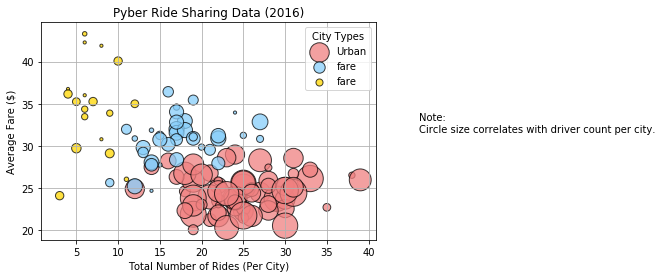

In [4]:
plt.scatter(urban_ride_ct["ride_id"], urban_avg["fare"], marker ='o', facecolors="lightcoral", edgecolors="black", label="Urban", s=urban_driver["driver_count"]*10, alpha=0.75)
plt.scatter(suburban_ride_ct["ride_id"], suburban_avg["fare"], marker ='o', facecolors="lightskyblue", edgecolors="black", s=suburban_driver["driver_count"]*10, alpha=0.75)
plt.scatter(rural_ride_ct["ride_id"], rural_avg["fare"], marker ='o', facecolors="gold", edgecolors="black", s=rural_driver["driver_count"]*10, alpha=0.75)
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title="City Types", loc="upper right")
plt.figtext(1, 0.5, "Note:\nCircle size correlates with driver count per city.")

In [5]:
fare_sum = urban_df["fare"].sum() + suburban_df["fare"].sum() + rural_df["fare"].sum()
urban_f_per = round(urban_df["fare"].sum()/fare_sum*100,1)
suburban_f_per = round(suburban_df["fare"].sum()/fare_sum*100,1)
rural_f_per = round(rural_df["fare"].sum()/fare_sum*100,1)
(fare_sum, urban_f_per, suburban_f_per, rural_f_per)

(63538.64000000001, 62.7, 30.5, 6.8)

Text(0.5, 1.0, '% of Total Fares by City Type')

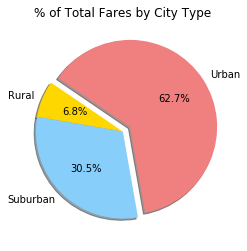

In [6]:
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_f_per, rural_f_per, suburban_f_per]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")

In [7]:
ride_per = pd.DataFrame(pyber_df["type"].value_counts())
ride_sum = ride_per["type"].sum()
urban_per = round(ride_per.loc["Urban", "type"]/ride_sum*100,1)
suburban_per = round(ride_per.loc["Suburban", "type"]/ride_sum*100,1)
rural_per = round(ride_per.loc["Rural", "type"]/ride_sum*100,1)
(urban_per, suburban_per, rural_per)

(68.4, 26.3, 5.3)

Text(0.5, 1.0, '% of Total Rides by City Type')

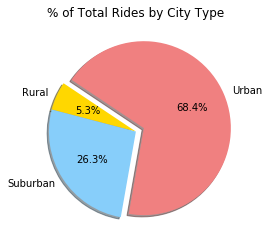

In [8]:
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_per, rural_per, suburban_per]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")

In [9]:
driver_sum = urban_driver["driver_count"].sum() + suburban_driver["driver_count"].sum() + rural_driver["driver_count"].sum()
urban_dr_per = round(urban_driver["driver_count"].sum()/driver_sum*100,1)
suburban_dr_per = round(suburban_driver["driver_count"].sum()/driver_sum*100,1)
rural_dr_per = round(rural_driver["driver_count"].sum()/driver_sum*100,1)
(urban_dr_per, suburban_dr_per, rural_dr_per)

(80.9, 16.5, 2.6)

Text(0.5, 1.0, '% of Total Drivers by City Type')

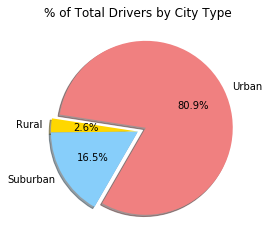

In [10]:
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_dr_per, rural_dr_per, suburban_dr_per]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")